# Student Performance Indicator

**We are going to follow the following steps:**
1. Understanding Problem Statement **`Done`**
1. Data Collection **`Done`**
1. Data Cleaning **`Done`**
1. EDA & Feature Engineering **`Done`**
1. Data Preprocessing **`Done`**
1. Basic Model Training
1. Basic Model Evaluation

## 6. Basic Model Transformation & Training

#### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

#### Importing Dataset

In [2]:
df = pd.read_csv('../data/preprocessed_student.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,69.963370,72.666667
1,female,group C,some college,standard,completed,69,90,88,80.586081,82.333333
2,female,group B,master's degree,standard,none,90,95,93,91.941392,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,44.322344,49.333333
4,male,group C,some college,standard,none,76,78,75,73.992674,76.333333


#### Divide dataset into features and target variable

In [3]:
X = df.drop(columns = ['math_score'], axis = 1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,74,69.963370,72.666667
1,female,group C,some college,standard,completed,90,88,80.586081,82.333333
2,female,group B,master's degree,standard,none,95,93,91.941392,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,44.322344,49.333333
4,male,group C,some college,standard,none,78,75,73.992674,76.333333


In [4]:
y = df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

#### Data Transformation

In [5]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [6]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 21)

#### Train & Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((800, 21), (200, 21))

## 7. Basic Model Training and Evaluation

#### Evaluate Model Function

In [8]:
def eval_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    r2_value = r2_score(true, pred)
    return mae, mse, rmse, r2_value

#### All Models List

In [9]:
models = {
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

#### Training & Evaluation Results

In [10]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = eval_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = eval_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("Mean Squared Error: {:.4f}".format(model_train_mse))
    print("Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("R2 Score: {:.4f}".format(model_train_r2))

    print('-'*36)
    
    print('Model performance for Test set')
    print("Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("Mean Squared Error: {:.4f}".format(model_test_mse))
    print("Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*36, "\n")

K-Neighbors Regressor
Model performance for Training set
Mean Absolute Error: 3.3838
Mean Squared Error: 18.3105
Root Mean Squared Error: 4.2791
R2 Score: 0.9188
------------------------------------
Model performance for Test set
Mean Absolute Error: 4.0500
Mean Squared Error: 26.8508
Root Mean Squared Error: 5.1818
R2 Score: 0.8897

Decision Tree
Model performance for Training set
Mean Absolute Error: 0.0000
Mean Squared Error: 0.0000
Root Mean Squared Error: 0.0000
R2 Score: 1.0000
------------------------------------
Model performance for Test set
Mean Absolute Error: 3.1350
Mean Squared Error: 15.6750
Root Mean Squared Error: 3.9592
R2 Score: 0.9356

Random Forest Regressor
Model performance for Training set
Mean Absolute Error: 0.8337
Mean Squared Error: 1.1603
Root Mean Squared Error: 1.0772
R2 Score: 0.9949
------------------------------------
Model performance for Test set
Mean Absolute Error: 2.1230
Mean Squared Error: 8.5407
Root Mean Squared Error: 2.9224
R2 Score: 0.9649

X

#### Results

In [11]:
model_eval_res_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
model_eval_res_df

,Model Name,R2_Score
3,XGBRegressor,0.977101
4,CatBoosting Regressor,0.968100
2,Random Forest Regressor,0.964902
1,Decision Tree,0.935584
5,AdaBoost Regressor,0.923375
0,K-Neighbors Regressor,0.889657


#### Best Performer Model - XGBRegressor

In [12]:
lr = XGBRegressor(fit_intercept=True)
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy (based on r2 score) of the model is %.2f"%score)

Accuracy (based on r2 score) of the model is 97.71


Predicted VS Actual Labels Graph

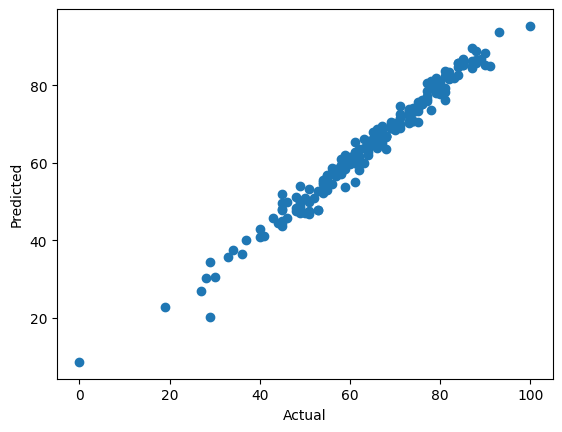

In [13]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

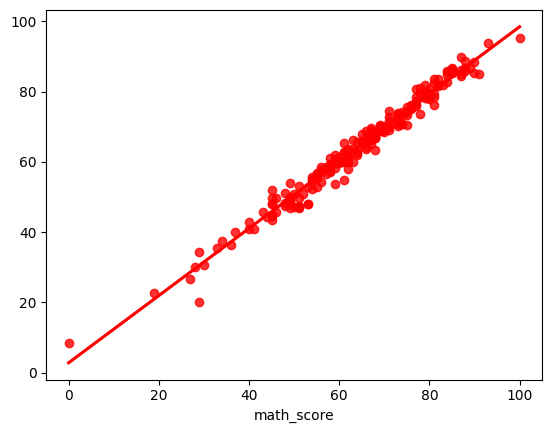

In [14]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Difference between predicted and actual labels

In [15]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,84.985962,6.014038
737,53,52.825253,0.174747
740,80,79.658371,0.341629
660,74,70.756973,3.243027
411,84,85.663795,-1.663795
...,...,...,...
408,52,51.001301,0.998699
332,62,63.690971,-1.690971
208,74,70.854652,3.145348
613,65,65.438904,-0.438904


#### Cross-Validation Score

In [16]:
xgb_model = XGBRegressor()
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')

# Print the cross-validated RMSE scores
print("Cross-validated r2 scores:", cv_scores)
print("Mean r2 score:", np.mean(cv_scores))
print(f"Average Accuracy (based on r2 score) is {(np.mean(cv_scores) * 100):.2f}%")


Cross-validated r2 scores: [0.97408843 0.97343043 0.96408384 0.97850614 0.97554631]
Mean r2 score: 0.9731310292489328
Average Accuracy (based on r2 score) is 97.31%


#### Conclusion
##### XGBRegressor Model performed best among all other models and achieved the highest r2 score of `0.9731`. 